# Replication: CS-Flow One Angle G-Link

In this notebook, we reduced the G-Link dataset to images shot from a very similar angle.

In [2]:
from __init__ import activate_cs_flow_config, CSFLOW_DIR
import shutil

# First, we activate the correct configuration.
activate_cs_flow_config(name='one-angle-g-link')

# Extracting Features

In [2]:
import os
import numpy as np
from src.repos.cs_flow.utils import load_datasets, make_dataloaders
from src.repos.cs_flow.extract_features import extract
import src.repos.cs_flow.config as c


prepend_dir = str(CSFLOW_DIR.resolve()) + '/'
export_name = c.class_name
export_dir = prepend_dir + 'data/features/' + export_name + '/'
image_paths = export_dir + c.class_name + '_image_paths.npy'
c.pre_extracted = False
os.makedirs(export_dir, exist_ok=True)
train_set, test_set = load_datasets(prepend_dir + c.dataset_path, c.class_name)
train_loader, test_loader = make_dataloaders(train_set, test_set)

In [3]:
from pathlib import Path

if not Path(image_paths).exists():
    extract(train_loader, test_loader, export_dir, c.class_name)
    paths = [p for p, l in test_set.samples]
    np.save(export_dir + c.class_name + '_image_paths.npy', paths)

# Training

In [4]:
from src.repos.cs_flow.train import train

results = train(train_loader, test_loader)
if isinstance(results, tuple):
    model = results[0]
    print(results[1:])
else:
    model = results

# Evaluation

In [5]:
localize = True
upscale_mode = 'bilinear'
score_export_dir = CSFLOW_DIR.joinpath('./viz/scores/', c.modelname)
os.makedirs(score_export_dir, exist_ok=True)
map_export_dir = CSFLOW_DIR.joinpath('./viz/maps/', c.modelname)
os.makedirs(map_export_dir, exist_ok=True)

Loaded pretrained weights for efficientnet-b5

Compute maps, loss and scores on test set:


100%|██████████| 9/9 [00:07<00:00,  1.17it/s]
/home/qsen/miniconda3/envs/ecml25repl/lib/python3.13/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges
/home/qsen/miniconda3/envs/ecml25repl/lib/python3.13/site-packages/numpy/lib/_histograms_impl.py:901: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


AUC: 0.7479591836734695
type: anomaly; min/max: 7.859832286834717/138.27999877929688
type: anomaly; min/max: 8.040095329284668/123.4452133178711
type: anomaly; min/max: 8.720196723937988/99.91920471191406
type: anomaly; min/max: 8.521385192871094/110.92506408691406
type: anomaly; min/max: 8.723895072937012/144.27098083496094
type: anomaly; min/max: 8.669668197631836/114.106201171875
type: anomaly; min/max: 8.47732925415039/151.6294403076172
type: anomaly; min/max: 8.066499710083008/133.1437225341797
type: anomaly; min/max: 8.433090209960938/140.18699645996094
type: anomaly; min/max: 8.922029495239258/111.2439956665039
type: anomaly; min/max: 8.686259269714355/143.8550262451172
type: anomaly; min/max: 8.190021514892578/129.41339111328125
type: anomaly; min/max: 8.275846481323242/132.49549865722656
type: anomaly; min/max: 8.132137298583984/140.97900390625
type: anomaly; min/max: 8.473942756652832/111.05963897705078
type: anomaly; min/max: 8.380805015563965/104.79397583007812
type: anomal

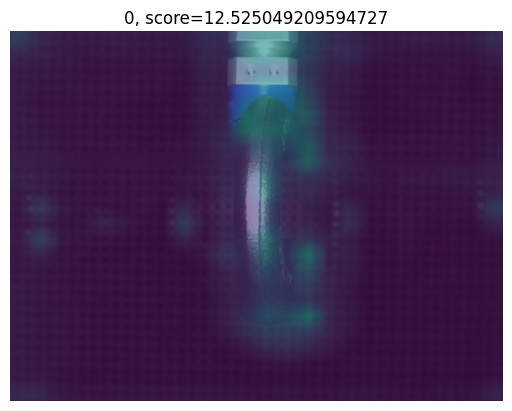

In [6]:
from src.repos.cs_flow.model import load_model
from src.repos.cs_flow.evaluate import compare_histogram, viz_roc, viz_map_array, evaluate

img_paths = test_set.paths if c.pre_extracted else [p for p, l in test_set.samples]
_, test_loader = make_dataloaders(train_set, test_set)
mod = load_model(c.modelname)
evaluate(mod, test_loader, score_export_dir, map_export_dir, img_paths, localize)